In [1]:

pip install cliffs-delta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats
from cliffs_delta import cliffs_delta
import missingno as msno


# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Lab 1 contains 4 analysis questions. 
The dataset is collected from the New York government. You can find the
detailed data description (columns, building code) here: https://www.nyc.gov/site/finance/taxes/property-rolling-sales-data.page
Your goal is to fill in the missing blocks and submit the ipynb file as your lab submission to onq. You have until next Wednesday end to complete lab1, but we encourage to complete it as soon as possible.

Question 1: Load in the provided dataset 20to22NYC.csv and summarize the basic statistics. Specifically your code should answer:

1) What are the feature types and their basic statistics (using describe(include='all'))
2) How many features have missing values? 
3) What are the patterns of missing values and potential missing data reason for the top-3 most missed features.

In [3]:
# Step 1, load data and check basic data type information
all_data = pd.read_csv('/content/20to22NYC.csv')
all_data.head(10)

# we can also check the end of the table, why this might help? because sometimes there would be extra content provided by the data author at the end of the table and you keep that as part of the data.
all_data.tail(10)

# info is a function provided by pandas. This method prints informaiton about a DataFrame including the index dtype and columns, non-null values, and memory usage, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
# more about data types in pandas: https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes


all_data.info()


<ipython-input-3-880e7ad39849>:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv('/content/20to22NYC.csv')


BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0        5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   5391   
1        5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   5404   
2        5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   5407   
3        5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   5425   
4        5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   6205   
5        5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   6205   
6        5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   6205   
7        5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   6205   
8        5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   6205   
9        5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   6211   

   LOT BUILDING CLASS AT PRESENT             ADDRESS APARTMENT NUMBER  \
0    9                        A5     4726 AMBOY ROAD              NaN   
1   46                        A1   119 LENZIE STREET              NaN   
2    6                        A1  118 ELMBANK STREET              NaN   
3   31                        A1    7 SANDGAP STREET              NaN   
4   17                        A5     91 EAGAN AVENUE              NaN   
5   83                        A1     7 SEGUINE PLACE              NaN   
6  115                        A5        44 MAY PLACE              NaN   
7  124                        A5        22 MAY PLACE              NaN   
8  145                        A5    60 SEGUINE PLACE              NaN   
9   16                        A5     15 EAGAN AVENUE              NaN   

   ZIP CODE RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS  LAND SQUARE FEET  \
0   10312.0               1.0              0.0         1.0            3067.0   
1   10312.0               1.0              0.0         1.0            8000.0   
2   10312.0               1.0              0.0         1.0            6200.0   
3   10312.0               1.0              0.0         1.0            2500.0   
4   10312.0               1.0              0.0         1.0            1845.0   
5   10312.0               1.0              0.0         1.0            3989.0   
6   10312.0               1.0              0.0         1.0            2475.0   
7   10312.0               1.0              0.0         1.0            2475.0   
8   10312.0               1.0              0.0         1.0            1471.0   
9   10312.0               1.0              0.0         1.0            2550.0   

   GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0              910.0      2002.0                          1   
1             3660.0      1998.0                          1   
2             2580.0      1975.0                          1   
3             1222.0      1925.0                          1   
4             1854.0      1986.0                          1   
5             2300.0      2004.0                          1   
6             2495.0      1986.0                          1   
7             2495.0      1986.0                          1   
8             1172.0      1986.0                          1   
9             1825.0      1986.0                          1   

  BUILDING CLASS AT TIME OF SALE  SALE PRICE   SALE DATE  
0                             A5         0.0  2020-07-02  
1                             A1    315000.0  2020-10-02  
2                             A1    450000.0  2020-06-24  
3                             A2    525000.0  2020-07-02  
4                             A5    480000.0  2020-01-14  
5                             A1    720000.0  2020-10-15  
6                             A5         0.0  2020-12-11  
7                             A5         0.0  2020-09-17  
8                             A5    429000.0  2020-11-19  
9                             A5    550000.0  2020-10-22

BOROUGH NEIGHBORHOOD    BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
258454        4     WOODSIDE  31 COMMERCIAL VACANT LAND                    4   
258455        4     WOODSIDE  31 COMMERCIAL VACANT LAND                    4   
258456        4     WOODSIDE  31 COMMERCIAL VACANT LAND                    4   
258457        4     WOODSIDE           44 CONDO PARKING                    4   
258458        4     WOODSIDE           44 CONDO PARKING                    4   
258459        4     WOODSIDE           44 CONDO PARKING                    4   
258460        4     WOODSIDE           44 CONDO PARKING                    4   
258461        4     WOODSIDE           44 CONDO PARKING                    4   
258462        4     WOODSIDE           44 CONDO PARKING                    4   
258463        4     WOODSIDE           44 CONDO PARKING                    4   

        BLOCK   LOT BUILDING CLASS AT PRESENT                       ADDRESS  \
258454   1321    15                        V1             43-15 52ND STREET   
258455   1321    16                        V1             4315A 52ND STREET   
258456   1321    17                        V1             43-13 52ND STREET   
258457   1183  1036                        RP        33-30 61ST STREET, P13   
258458   1183  1038                        RP        33-30 61ST STREET, P15   
258459   1300  1114                        RP         40-45 68TH STREET, P5   
258460   1337  1229                        RP         41-52 63RD STREET, P5   
258461   2324  1109                        RG   63-14 QUEENS BOULEVARD, P-4   
258462   2324  1152                        RG  63-14 QUEENS BOULEVARD, P-49   
258463   2324  1153                        RG  63-14 QUEENS BOULEVARD, P-50   

       APARTMENT NUMBER  ZIP CODE RESIDENTIAL UNITS COMMERCIAL UNITS  \
258454              NaN   11377.0                 0                0   
258455              NaN   11377.0                 0                0   
258456              NaN   11377.0                 0                0   
258457              P13   11377.0               NaN                1   
258458              P15   11377.0               NaN                1   
258459               P5   11377.0               NaN                1   
258460               P5   11377.0               NaN                1   
258461              P-4   11377.0               NaN                1   
258462             P-49   11377.0               NaN                1   
258463             P-50   11377.0               NaN                1   

       TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
258454           0            2000.0                0.0         NaN   
258455           0            2000.0                0.0         NaN   
258456           0            4000.0                0.0         NaN   
258457           1               NaN                NaN      2008.0   
258458           1               NaN                NaN      2008.0   
258459           1               NaN                NaN      2008.0   
258460           1               NaN                NaN      2005.0   
258461           1               NaN                NaN      2008.0   
258462           1               NaN                NaN      2008.0   
258463           1               NaN                NaN      2008.0   

        TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  SALE PRICE  \
258454                          4                             V1   9650000.0   
258455                          4                             V1   9650000.0   
258456                          4                             V1   9650000.0   
258457                          4                             RP    675000.0   
258458                          4                             RP    721000.0   
258459                          4                             RP    598000.0   
258460                          4                             RP    565000.0   
258461                          4         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258464 entries, 0 to 258463
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         258464 non-null  int64  
 1   NEIGHBORHOOD                    258464 non-null  object 
 2   BUILDING CLASS CATEGORY         258464 non-null  object 
 3   TAX CLASS AT PRESENT            258143 non-null  object 
 4   BLOCK                           258464 non-null  int64  
 5   LOT                             258464 non-null  int64  
 6   BUILDING CLASS AT PRESENT       258143 non-null  object 
 7   ADDRESS                         258464 non-null  object 
 8   APARTMENT NUMBER                62945 non-null   object 
 9   ZIP CODE                        258445 non-null  float64
 10  RESIDENTIAL UNITS               199349 non-null  object 
 11  COMMERCIAL UNITS                162951 non-null  object 
 12  TOTAL UNITS     

In [ ]:
tmp = all_data.describe(include="all")
tmp

BOROUGH    NEIGHBORHOOD  BUILDING CLASS CATEGORY  \
count   258464.000000          258464                   258464   
unique            NaN             255                       44   
top               NaN  FLUSHING-NORTH  01 ONE FAMILY DWELLINGS   
freq              NaN            8419                    57236   
mean         2.982249             NaN                      NaN   
std          1.291469             NaN                      NaN   
min          1.000000             NaN                      NaN   
25%          2.000000             NaN                      NaN   
50%          3.000000             NaN                      NaN   
75%          4.000000             NaN                      NaN   
max          5.000000             NaN                      NaN   

       TAX CLASS AT PRESENT          BLOCK            LOT  \
count                258143  258464.000000  258464.000000   
unique                   10            NaN            NaN   
top                       1            NaN            NaN   
freq                 118084            NaN            NaN   
mean                    NaN    4205.347228     390.798494   
std                     NaN    3583.533963     663.856622   
min                     NaN       1.000000       1.000000   
25%                     NaN    1251.000000      22.000000   
50%                     NaN    3273.500000      52.000000   
75%                     NaN    6251.000000    1003.000000   
max                     NaN   16350.000000    9116.000000   

       BUILDING CLASS AT PRESENT          ADDRESS APARTMENT NUMBER  \
count                     258143           258464            62945   
unique                       174           241541             9040   
top                           R4  55 AUSTIN PLACE               3A   
freq                       41698               24              975   
mean                         NaN              NaN              NaN   
std                          NaN              NaN              NaN   
min                          NaN              NaN              NaN   
25%                          NaN              NaN              NaN   
50%                          NaN              NaN              NaN   
75%                          NaN              NaN              NaN   
max                          NaN              NaN              NaN   

             ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
count   258445.000000           199349.0          162951.0     205304.0   
unique            NaN              446.0             116.0        475.0   
top               NaN                1.0               0.0          1.0   
freq              NaN            69433.0          102435.0      58318.0   
mean     10850.341763                NaN               NaN          NaN   
std        562.709495                NaN               NaN          NaN   
min      10001.000000                NaN               NaN          NaN   
25%      10305.000000                NaN               NaN          NaN   
50%      11208.000000                NaN               NaN          NaN   
75%      11355.000000                NaN               NaN          NaN   
max      11697.000000                NaN               NaN          NaN   

        LAND SQUARE FEET  GROSS SQUARE FEET     YEAR BUILT  \
count       1.569960e+05       1.569960e+05  240618.000000   
unique               NaN                NaN            NaN   
top                  NaN                NaN            NaN   
freq                 NaN                NaN            NaN   
mean        6.006378e+03       5.488587e+03    1952.672522   
std         1.139290e+05       4.887278e+04      36.162119   
min         0.000000e+00       0.000000e+00     220.000000   
25%         1.900000e+03       1.224000e+03    1925.000000   
50%         2.500000e+03       1.810000e+03    1950.000000   
75%         3.909250e+03       2.670000e+03    1977.000000   
max         7.649136e+06       8.942176e+06    2022.000000   

 

624750

BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                 321
BLOCK                                  0
LOT                                    0
BUILDING CLASS AT PRESENT            321
ADDRESS                                0
APARTMENT NUMBER                  195519
ZIP CODE                              19
RESIDENTIAL UNITS                  59115
COMMERCIAL UNITS                   95513
TOTAL UNITS                        53160
LAND SQUARE FEET                  101468
GROSS SQUARE FEET                 101468
YEAR BUILT                         17846
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS AT TIME OF SALE         0
SALE PRICE                             0
SALE DATE                              0
dtype: int64

<Axes: >

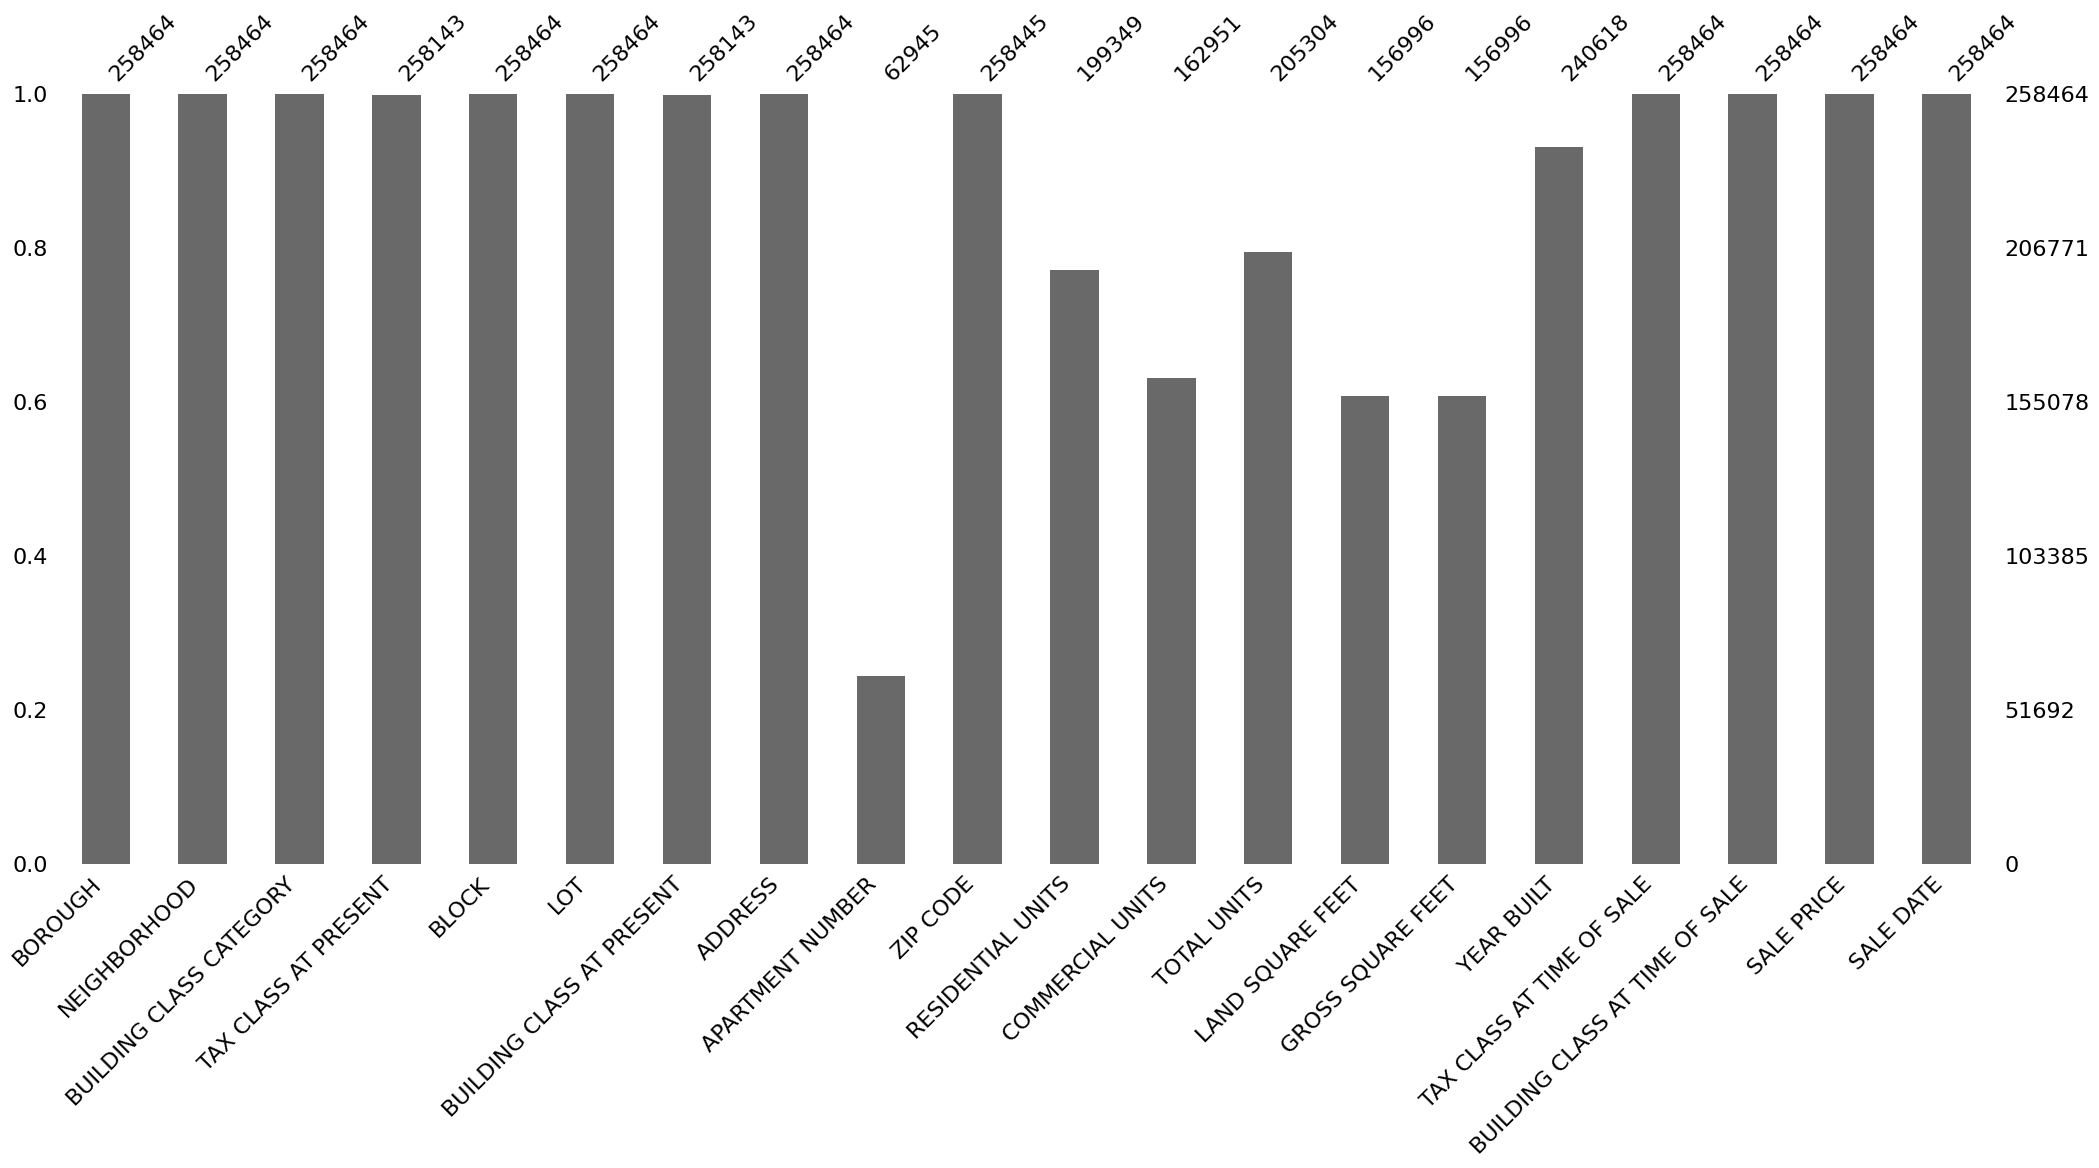

In [ ]:
# check missing values


# count the total number of missing values
all_data.isnull().values.sum()

# column-wise summary of missing values
all_data.isna().sum()

# visualize using msno package, no need in this case, just give for demo purpose.
msno.bar(all_data)

<Axes: >

Text(0.5, 1.0, 'Missing Value Patterns for Top-3 Most Missed Features')

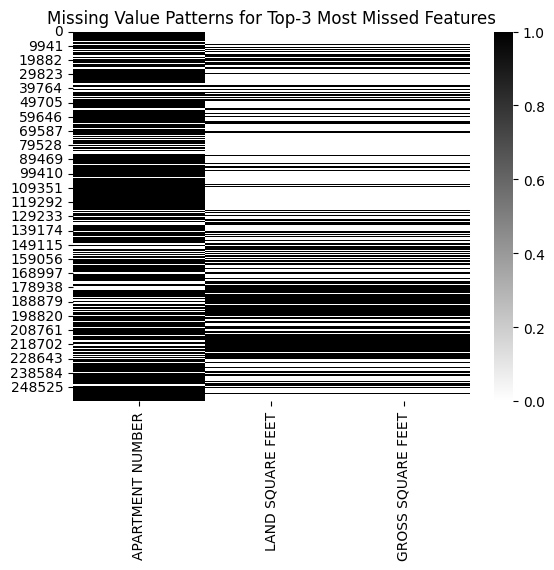

       APARTMENT NUMBER LAND SQUARE FEET GROSS SQUARE FEET
count            258464           258464            258464
unique                2                2                 2
top                True            False             False
freq             195519           156996            156996


In [ ]:
# Identify the top-3 most missed features
top_missed_features = all_data.isnull().sum().sort_values(ascending=False)[:3].index.tolist()

# Get summary statistics for the missing values
missing_data_summary = all_data[top_missed_features].isnull().describe()

# Visualize the missing value patterns using a heatmap
sns.heatmap(all_data[top_missed_features].isnull(), cmap='binary')
plt.title('Missing Value Patterns for Top-3 Most Missed Features')
plt.show()

# Print the summary statistics for the missing values
print(missing_data_summary)

Contingency table for missing values by building class category for APARTMENT NUMBER:
BUILDING CLASS CATEGORY  01 ONE FAMILY DWELLINGS  02 TWO FAMILY DWELLINGS  \
APARTMENT NUMBER                                                            
False                                         18                       28   
True                                       57218                    47604   

BUILDING CLASS CATEGORY  03 THREE FAMILY DWELLINGS  04 TAX CLASS 1 CONDOS  \
APARTMENT NUMBER                                                            
False                                           23                   4199   
True                                         13153                    900   

BUILDING CLASS CATEGORY  05 TAX CLASS 1 VACANT LAND  06 TAX CLASS 1 - OTHER  \
APARTMENT NUMBER                                                              
False                                             0                       0   
True                                           3199        

<Axes: xlabel='LAND SQUARE FEET', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of LAND SQUARE FEET')

<Axes: xlabel='GROSS SQUARE FEET', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of GROSS SQUARE FEET')

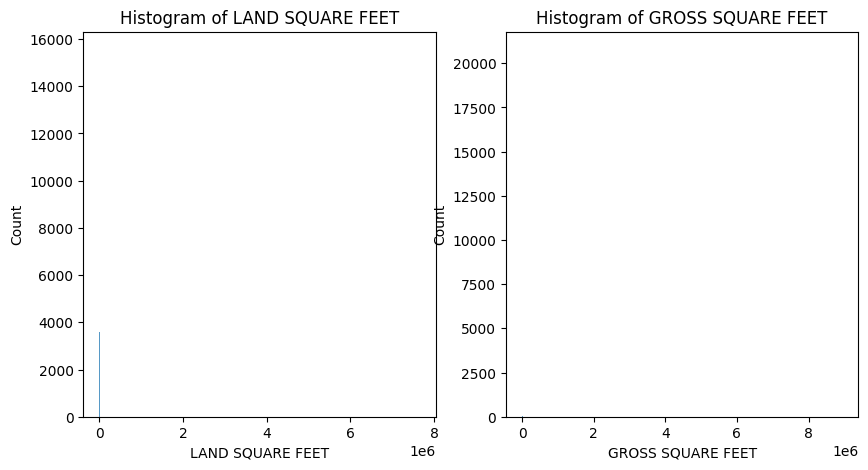

Contingency table for missing values by property size for LAND SQUARE FEET:
LAND SQUARE FEET BINNED  (0.0, 1000.0]  (1000.0, 5000.0]  (5000.0, 10000.0]  \
LAND SQUARE FEET                                                              
False                             1964            123479              11616   

LAND SQUARE FEET BINNED  (10000.0, 50000.0]  (50000.0, 100000.0]  \
LAND SQUARE FEET                                                   
False                                  4442                  377   

LAND SQUARE FEET BINNED  (100000.0, 500000.0]  (500000.0, 1000000.0]  \
LAND SQUARE FEET                                                       
False                                     199                     36   

LAND SQUARE FEET BINNED  (1000000.0, inf]  
LAND SQUARE FEET                           
False                                  72  
Chi-squared test results for missing values by property size for LAND SQUARE FEET:
Chi-squared statistic: 0.0
p-value: 1.0
Contingen

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency



# Create a contingency table of missing values by building class category for APARTMENT NUMBER
contingency_table = pd.crosstab(all_data['APARTMENT NUMBER'].isnull(), all_data['BUILDING CLASS CATEGORY'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Contingency table for missing values by building class category for APARTMENT NUMBER:')
print(contingency_table)

print('Chi-squared test results for missing values by building class category for APARTMENT NUMBER:')
print('Chi-squared statistic:', chi2)
print('p-value:', p)

# Create histograms of property size for LAND SQUARE FEET and GROSS SQUARE FEET
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(all_data['LAND SQUARE FEET'].dropna(), ax=ax[0])
ax[0].set_title('Histogram of LAND SQUARE FEET')
sns.histplot(all_data['GROSS SQUARE FEET'].dropna(), ax=ax[1])
ax[1].set_title('Histogram of GROSS SQUARE FEET')
plt.show()

# Create a contingency table of missing values by property size for LAND SQUARE FEET
all_data['LAND SQUARE FEET BINNED'] = pd.cut(all_data['LAND SQUARE FEET'], [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, float('inf')])
contingency_table = pd.crosstab(all_data['LAND SQUARE FEET'].isnull(), all_data['LAND SQUARE FEET BINNED'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Contingency table for missing values by property size for LAND SQUARE FEET:')
print(contingency_table)

print('Chi-squared test results for missing values by property size for LAND SQUARE FEET:')
print('Chi-squared statistic:', chi2)
print('p-value:', p)

# Create a contingency table of missing values by property size for GROSS SQUARE FEET
all_data['GROSS SQUARE FEET BINNED'] = pd.cut(all_data['GROSS SQUARE FEET'], [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, float('inf')])
contingency_table = pd.crosstab(all_data['GROSS SQUARE FEET'].isnull(), all_data['GROSS SQUARE FEET BINNED'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Contingency table for missing values by property size for GROSS SQUARE FEET:')
print(contingency_table)

print('Chi-squared test results for missing values by property size for GROSS SQUARE FEET:')
print('Chi-squared statistic:', chi2)
print('p-value:', p)

:Summarize your answers to Q1 below, based on your analysis:
\\\\
Question 1: Load in the provided dataset 20to22NYC.csv and summarize the basic statistics. Specifically your code should answer:

1) What are the feature types and their basic statistics (using describe(include='all')) 2) How many features have missing values? 3) What are the patterns of missing values and potential missing data reason for the top-3 most missed features.

first i load the data and i describe the features type by info method and thae data type of all features was among these option(int// float//object) and i show there statistic information by describe method 

second i show in the data how many features have missing values  and there were 10 features that have missing values i use sim visualization to show missing data values in each feature.

third the top most three features are APARTMENT NUMBER LAND SQUARE FEET GROSS SQUARE FEET
 and the the pattern , reason why they are top most three missing data values features are i show them by 
i then perform statistical tests and visualizations to look for patterns in the missing values for each of the top three missing features.

For the 'APARTMENT NUMBER' feature, i use the chi-squared test to examine the association between missing values and building class category. i create a contingency table of missing values by building class category using the crosstab() method of the pandas DataFrame.i then use the chi2_contingency() function from the scipy.stats module to perform the chi-squared test and calculate the chi-squared statistic, p-value, degrees of freedom, and expected frequencies.i print the contingency table and the chi-squared test results. If the p-value is less than 0.05 i may reject the null hypothesis of no association and conclude that the missing values are MAR or MNAR.

For the 'LAND SQUARE FEET' and 'GROSS SQUARE FEET' features, i create histograms of property size to visualize the distribution of non-missing values. i then use the chi-squared test to examine the association between missing values and property size. i create a contingency table of missing values by property size using the crosstab() method of the pandas DataFrame with the cut() method to bin the property size into different size categories. i then use the chi2_contingency() function from the scipy.stats module to perform the chi-squared test and calculate the chi-squared statistic, p-value, degrees of freedom, and expected frequencies. i print the contingency table and the chi-squared test results. If the p-value is less than 0.05, i may reject the null hypothesis of no association and conclude that the missing values are MNAR.




Question 2: Check the normality of the target variable, i.e., 'SALE PRICE', using both graphical and statistical test methods.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest

<Axes: xlabel='SALE PRICE', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of SALE PRICE')

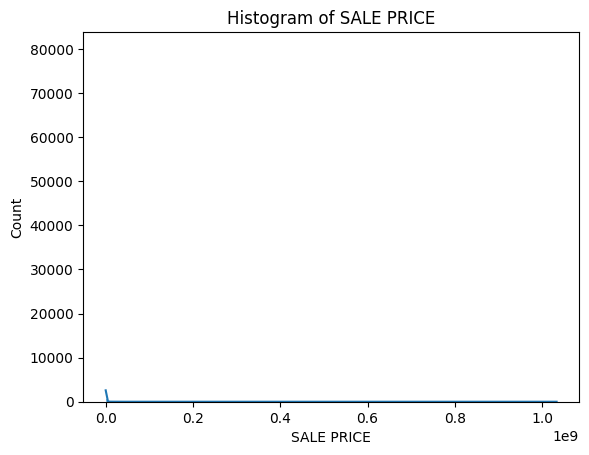

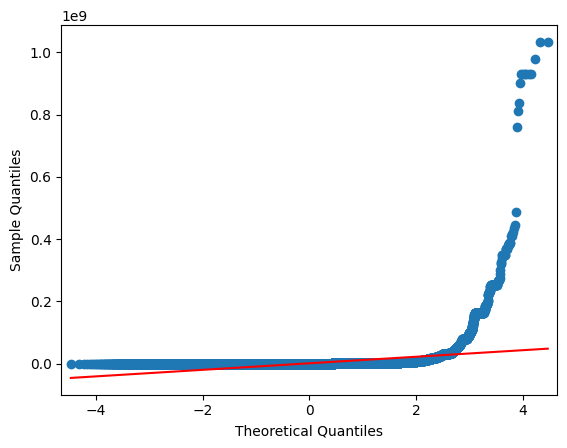

Text(0.5, 1.0, 'Q-Q Plot of SALE PRICE')

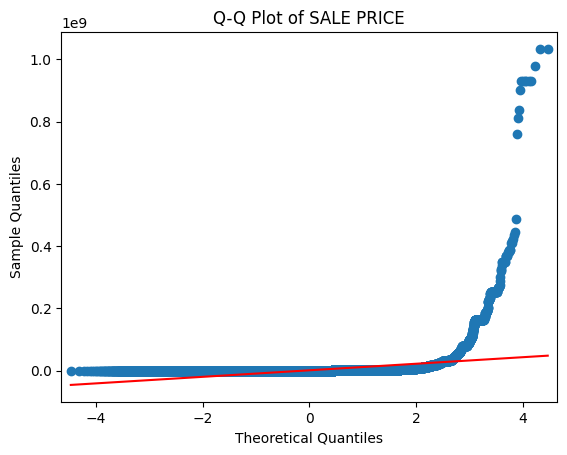

Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# put your code for Q2 here, you can have multiple code blocks.
# Check the distribution of the target variable using a histogram
sns.histplot(all_data['SALE PRICE'], kde=True)
plt.title('Histogram of SALE PRICE')
plt.show()

# Check the distribution of the target variable using a Q-Q plot
sm.qqplot(all_data['SALE PRICE'], line='s')
plt.title('Q-Q Plot of SALE PRICE')
plt.show()

# Check the normality of the target variable using the Shapiro-Wilk test
stat, p = shapiro(all_data['SALE PRICE'])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Check the normality of the target variable using the D'Agostino-Pearson test
stat, p = normaltest(all_data['SALE PRICE'])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

<ipython-input-17-49ddf88dba5e>:9: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



GROSS SQUARE FEET            56.375863
LAND SQUARE FEET             50.211927
SALE PRICE                   46.154426
LOT                           3.330028
TAX CLASS AT TIME OF SALE     1.530335
BLOCK                         1.061227
dtype: float64

<ipython-input-17-49ddf88dba5e>:19: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




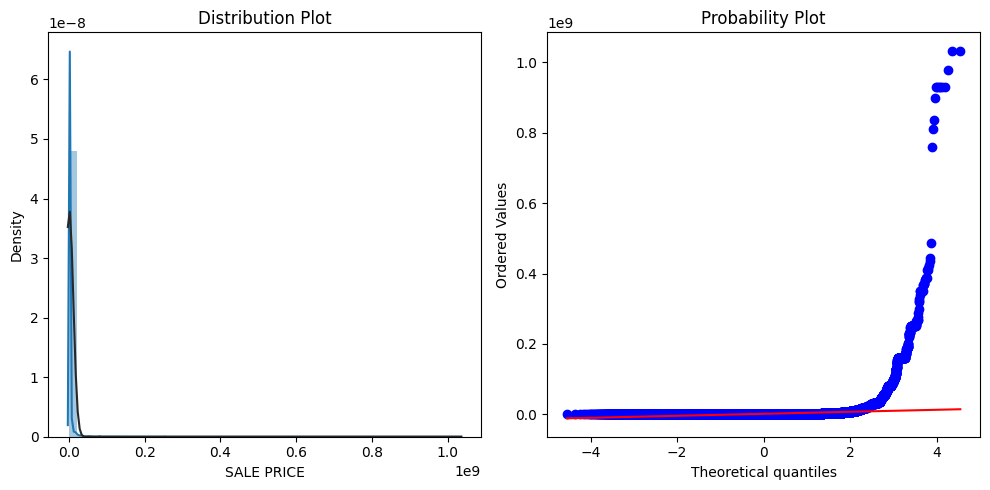

In [ ]:
fig = px.box(all_data, y = 'SALE PRICE')
fig.show()

fig = px.histogram(all_data, x = 'SALE PRICE')
fig.show()

  
# Visualize and calculate the skewness
skewness = all_data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 1]

def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

normality_plot(all_data['SALE PRICE'])

Summarize your answers to Q2 below, based on your analysis:

i Creates a histogram and Q-Q plot of the 'SALE PRICE' variable using the Seaborn library to visualize its distribution.
Calculates the Shapiro-Wilk test for normality using the shapiro() function from the SciPy library, and prints the results of the test.
Calculates the D'Agostino-Pearson test for normality using the normaltest() function from the SciPy library, and prints the results of the test.



The Shapiro-Wilk test and D'Agostino-Pearson test are both statistical tests for normality that can be used to determine whether a sample is likely to have been drawn from a Gaussian distribution. In both tests, the null hypothesis (H0) is that the sample is drawn from a Gaussian distribution, and the alternate hypothesis (H1) is that the sample is not drawn from a Gaussian distribution. and the sample does not look guassian

If the p-value of the test is less than the significance level (alpha) of 0.05, we reject the null hypothesis and conclude that the sample is not drawn from a Gaussian distribution. If the p-value is greater than alpha, we fail to reject the null hypothesis and conclude that the sample is drawn from a Gaussian distribution. also the sample does not look guassian


i also check the normality of the target varible  using a normalttiy functiom and it have not a normal distribution


Question 3: Design hypothesis test to answer the following two questions:

"Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?"

"Do properties in Manhattan sell at higher prices than properties elsewhere?"

For each question, you need to give the null hypothesis $H_0$ and alternative hypothesis $H_1$


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html\\\\\

*   List item
*   List item



In [ ]:
# put your code for Q3 here, you can have multiple code blocks.
import pandas as pd
from scipy.stats import ttest_ind



# Question 1: Has the NYC real estate market changed following the declaration of the COVID-19 pandemic in March of 2020?

# Filter the data to include only sales from before and after March 2020
sales_before = all_data.loc[all_data['SALE DATE'] < '2020-03-01', 'SALE PRICE']
sales_after = all_data.loc[all_data['SALE DATE'] >= '2020-03-01', 'SALE PRICE']

# Perform a t-test to compare the means of the two samples
stat, p = ttest_ind(sales_before, sales_after, equal_var=False)

# Set the significance level
alpha = 0.05

# Print the results of the hypothesis test
if p > alpha:
    print('Null hypothesis cannot be rejected: The NYC real estate market has not changed significantly following the declaration of the COVID-19 pandemic in March of 2020')
else:
    print('Null hypothesis rejected: The NYC real estate market has changed significantly following the declaration of the COVID-19 pandemic in March of 2020')

# Question 2: Do properties in Manhattan sell at higher prices than properties elsewhere?

# Filter the data to include only sales in Manhattan and sales outside of Manhattan
sales_manhattan = all_data.loc[all_data['BOROUGH'] == 'Manhattan', 'SALE PRICE']
sales_other = all_data.loc[all_data['BOROUGH'] != 'Manhattan', 'SALE PRICE']

# Perform a t-test to compare the means of the two samples
stat, p = ttest_ind(sales_manhattan, sales_other, equal_var=False)

# Set the significance level
alpha = 0.05

# Print the results of the hypothesis test
if p > alpha:
    print('Null hypothesis cannot be rejected: Properties in Manhattan do not sell at higher prices than properties elsewhere')
else:
    print('Null hypothesis rejected: Properties in Manhattan sell at higher prices than properties elsewhere')


Null hypothesis rejected: The NYC real estate market has changed significantly following the declaration of the COVID-19 pandemic in March of 2020
Null hypothesis rejected: Properties in Manhattan sell at higher prices than properties elsewhere


Summarize your answers to Q3 below, based on your analysis:


Null hypothesis (H0): The NYC real estate market has not changed significantly following the declaration of the COVID-19 pandemic in March of 2020.
Alternative hypothesis (H1): The NYC real estate market has changed significantly following the declaration of the COVID-19 pandemic in March of 2020.

"Do properties in Manhattan sell at higher prices than properties elsewhere?"

Null hypothesis (H0): Properties in Manhattan do not sell at higher prices than properties elsewhere.
Alternative hypothesis (H1): Properties in Manhattan sell at higher prices than properties elsewhere.

For question 1, filters the data to include only sales from before and after March 2020, and performs a two-sample t-test to compare the means of the two samples.
For question 2, filters the data to include only sales in Manhattan and sales outside of Manhattan, and performs a two-sample t-test to compare the means of the two samples.

 the result of the hypothesis

 Null hypothesis rejected: The NYC real estate market has changed significantly following the declaration of the COVID-19 pandemic in March of 2020
 
Null hypothesis rejected: Properties in Manhattan sell at higher prices than properties elsewhere

Question 4: Perform a multiple linear regression analysis on the given data, considering impact of missing values. Note, you need to properly transfer categorical features to numerical features first.
Report the features that are significant relevant to sale price based on the results of your regression model.

In [4]:
# Identify the categorical features in the data
categorical_features = [col for col in all_data.columns if all_data[col].dtype == 'object']
categorical_features

# Print the unique values of each categorical feature
#for feature in categorical_features:
    #print(feature + ': ' + str(all_data[feature].unique()))

['NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE DATE']

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer


# Load the NYC Property Sales dataset

df =pd.read_csv('/content/20to22NYC.csv')

# Drop irrelevant columns and rows with missing values
df = df.drop([ 'APARTMENT NUMBER'], axis=1)



# Convert categorical features to numerical features
le = LabelEncoder()
df['NEIGHBORHOOD'] = le.fit_transform(df['NEIGHBORHOOD'])
df['BUILDING CLASS CATEGORY'] = le.fit_transform(df['BUILDING CLASS CATEGORY'])
df['TAX CLASS AT PRESENT'] = le.fit_transform(df['TAX CLASS AT PRESENT'])
df['BUILDING CLASS AT PRESENT'] = le.fit_transform(df['BUILDING CLASS AT PRESENT'])
df['BUILDING CLASS AT TIME OF SALE'] = le.fit_transform(df['BUILDING CLASS AT TIME OF SALE'])
df['SALE DATE'] = le.fit_transform(df['SALE DATE'])
df['ADDRESS'] = le.fit_transform(df['ADDRESS'])
#convert categorical to numerical 
df['COMMERCIAL UNITS'] = pd.to_numeric(df['COMMERCIAL UNITS'], errors='coerce')
#convert categorical to numerical 
df['RESIDENTIAL UNITS'] = pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce')

#convert categorical to numerical 
df['TOTAL UNITS'] = pd.to_numeric(df['TOTAL UNITS'], errors='coerce')



# Split the dataset into training and testing sets
X = df.drop('SALE PRICE', axis=1)
print(df.columns)
y = df['SALE PRICE'] # apply log transformation to sale price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Impute missing values using the SimpleImputer class
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model performance on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

# Identify the significant features based on the model coefficients
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
significant_features = coef_df[coef_df['coefficient'] != 0]['feature']
print('Significant features:', list(significant_features))

<ipython-input-31-43e43e04c723>:12: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('/content/20to22NYC.csv')


Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')
R-squared score: 0.048730382959224716
Significant features: ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE']


In [32]:
# First Regression Model!
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

In [33]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [34]:
rmse(y_test, y_pred)

10586692.847932823

Summarize your answers to Q4 below, based on your analysis:


loads the NYC Property Sales dataset and drops irrelevant columns, such as APARTMENT NUMBER. It also impute  rows with missing values with simple imputer, which could impact the accuracy of the regression model.

the code uses the LabelEncoder class from the Scikit-learn library to convert the categorical features to numerical features. and for tatal //comerical//residential units i  use pd.numeric

The dataset is split into training and testing sets using the train_test_split function from Scikit-learn. The code then trains a linear regression model on the training set and evaluates its performance on the testing set using the R-squared score.
 and also i used rmse squared function to compute rmse and it was so big

Finally, the code identifies the significant features based on the model coefficients and prints a list of those features. These significant features can be used to better understand the factors that impact the sale price of properties in New York City.